<a href="https://colab.research.google.com/github/Terrano91/Demo/blob/master/h1b_kaggle_competitionbig_data22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import re
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier,ExtraTreesRegressor,RandomForestClassifier
from sklearn import metrics

print("Done importing")

Done importing


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
data=pd.read_csv('gdrive/My Drive/Data Science Projects/h1b_kaggle.csv',encoding='latin1') #encoding

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,20£1*6,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES232,CHIEF OPERATING OFFICER,Y,242674,20£1*6,"PLANO, TEXAS",-96.6988856,33.0198431
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES232,CHIEF PROCESS OFFICER,Y,193066,20£1*6,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES232,"REGIONAL PRESIDEN, AMERICAS",Y,220314,20£1*6,"DENVER, COLORADO",-104.990251,39.7392358
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES232,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,20£1*6,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025


In [5]:
data.shape

(3002458, 11)

In [6]:
data.describe()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
count,3002458,3002445,3002399,2984724,3002415,3002443,3002373,3002445,3002458,2895216,2895216
unique,3002458,8,236120,2141,287770,3,64665,9,18624,6042,4813
top,2099198,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,60000,20£1*6,"NEW YORK, NEW YORK",-74.0059413,40.7127837
freq,1,2615623,130592,291170,249038,2576111,7686,647803,191719,150401,118209


In [7]:
data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            object
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       object
YEAR                  object
WORKSITE              object
lon                   object
lat                   object
dtypes: object(11)
memory usage: 252.0+ MB


In [9]:
data['YEAR'].unique()

array(['20£1*6', '2015', 2015, 2014, 2013, 2012, 2011, '2011',
       'Twenty eleven', nan], dtype=object)

In [0]:
#stripping the unknown on year..
#data['YEAR']=data['YEAR'].str.strip("\£")
data['YEAR']=data['YEAR'].replace({'20£1*6':2016,'Twenty eleven':2011,'2015':2015,'2011':2011})
data['YEAR'].fillna(data['YEAR'].mode()[0], inplace=True)
#data.replace(np.nan,data.mode(axis=0), inplace=True)


In [11]:
data['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            object
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       object
YEAR                  float64
WORKSITE              object
lon                   object
lat                   object
dtypes: float64(1), object(10)
memory usage: 252.0+ MB


In [13]:
data['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.])

In [0]:
# date time series...
#data['YEAR']=data['YEAR'].astype('str')
#data['YEAR']=pd.to_datetime(data['YEAR'])

In [15]:
data.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016.0,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES232,CHIEF OPERATING OFFICER,Y,242674,2016.0,"PLANO, TEXAS",-96.6988856,33.0198431
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES232,CHIEF PROCESS OFFICER,Y,193066,2016.0,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES232,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016.0,"DENVER, COLORADO",-104.990251,39.7392358
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES232,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025


In [16]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                       0
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
Unnamed: 0            object
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       object
YEAR                  float64
WORKSITE              object
lon                   object
lat                   object
dtypes: float64(1), object(10)
memory usage: 252.0+ MB


In [18]:
data.shape

(3002458, 11)

In [19]:
data['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    201708
DENIED                                                  94346
WITHDRAWN                                               89799
CERTIFIED-+--WITHDRAWN                                    951
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [0]:
data['CASE_STATUS']=data['CASE_STATUS'].replace({'CERTIFIED-+--WITHDRAWN':'CERTIFIED-WITHDRAWN','Twenty eleven':'2011'})
data['CASE_STATUS'].fillna(data['CASE_STATUS'].mode()[0], inplace=True)

In [21]:
data['CASE_STATUS'].value_counts()

CERTIFIED                                             2615636
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [22]:
data['EMPLOYER_NAME'].nunique()

236120

In [0]:
data=data[data['EMPLOYER_NAME'].notnull()] # dropping all nulls


In [0]:
data['SOC_NAME'].nunique()
data=data[data['SOC_NAME'].notnull()]

In [0]:
data['JOB_TITLE'].nunique()
data=data[data['JOB_TITLE'].notnull()]

In [0]:
data=data[data['FULL_TIME_POSITION'].notnull()]

In [27]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME              0
SOC_NAME                   0
JOB_TITLE                  0
FULL_TIME_POSITION         0
PREVAILING_WAGE           63
YEAR                       0
WORKSITE                   0
lon                   106853
lat                   106853
dtype: int64

In [28]:
data.shape

(2984672, 11)

In [29]:
data['SOC_NAME'].nunique()

2141

In [0]:
data['PREVAILING_WAGE'] = data['PREVAILING_WAGE'].astype(str).str.replace('\£', '')
data['PREVAILING_WAGE'] = data['PREVAILING_WAGE'].astype(str).str.replace('\*', '')
data['PREVAILING_WAGE']=data['PREVAILING_WAGE'].replace({'3Twenty eleven':'32011'})

In [0]:
data['PREVAILING_WAGE']=data['PREVAILING_WAGE'].astype('float')

In [0]:
data['PREVAILING_WAGE'].fillna(data['PREVAILING_WAGE'].median(), inplace=True)

In [0]:
data['SOC_NAME']=data['SOC_NAME'].dropna(axis=0)

In [0]:
data['JOB_TITLE']=data['JOB_TITLE'].dropna(axis=0)

In [35]:
data['FULL_TIME_POSITION'].value_counts()


Y     2558458
N      425802
No        412
Name: FULL_TIME_POSITION, dtype: int64

In [0]:
data['FULL_TIME_POSITION']=data['FULL_TIME_POSITION'].replace({'No':'N'})
#data['FULL_TIME_POSITION'].replace(np.nan,data['FULL_TIME_POSITION'].mode,inplace=True)

In [37]:
data['FULL_TIME_POSITION'].value_counts()

Y    2558458
N     426214
Name: FULL_TIME_POSITION, dtype: int64

In [0]:
## Filling na in JOB_TITLE and FULL_TIME_POSITION with mode
#df['JOB_TITLE'] = df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0])
#df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0])
#df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

In [39]:
data['EMPLOYER_NAME'].head()

0                               UNIVERSITY OF MICHIGAN
1                               GOODMAN NETWORKS, INC.
2                            PORTS AMERICA GROUP, INC.
3    GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...
4                            PEABODY INVESTMENTS CORP.
Name: EMPLOYER_NAME, dtype: object

### Feature Creation-EMPLOYER_NAME

In [40]:
data['NEW_EMPLOYER']=np.nan  #creating a new columns with nan...
data.shape

(2984672, 12)

In [0]:
#categorizating employee as university n none university
warnings.filterwarnings("ignore")
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 'University'
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 'Non University', regex=True)

In [42]:
data['NEW_EMPLOYER'].head(5)

0        University
1    Non University
2    Non University
3    Non University
4    Non University
Name: NEW_EMPLOYER, dtype: object

In [0]:
# Creating occupation and mapping the values
warnings.filterwarnings("ignore")

data['OCCUPATION'] = np.nan
data['SOC_NAME'] = data['SOC_NAME'].str.lower()
data.OCCUPATION[data['SOC_NAME'].str.contains('computer','programmer')] = 'computer occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('software','web developer')] = 'computer occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('database')] = 'computer occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
data.OCCUPATION[data['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
data.OCCUPATION[data['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
data.OCCUPATION[data['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
data.OCCUPATION[data['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
data.OCCUPATION[data['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
data.OCCUPATION[data['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
data.OCCUPATION[data['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
data.OCCUPATION[data['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
data['OCCUPATION']= data.OCCUPATION.replace(np.nan, 'Others', regex=True)

In [0]:
# data.PREVAILING_WAGE.apply(lambda x: x.strip('£'))

In [45]:
data['OCCUPATION'].nunique()

11

In [0]:
#data['PREVAILING_WAGE']=data['PREVAILING_WAGE'].replace({'420£1*6':'42016','1720£1*6':'172016'})

In [0]:
#data['PREVAILING_WAGE']=data['PREVAILING_WAGE'].str.strip({"*","£"}).astype('float')


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984672 entries, 0 to 3002444
Data columns (total 13 columns):
Unnamed: 0            object
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   object
lat                   object
NEW_EMPLOYER          object
OCCUPATION            object
dtypes: float64(2), object(11)
memory usage: 318.8+ MB


In [48]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME              0
SOC_NAME                   0
JOB_TITLE                  0
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   106853
lat                   106853
NEW_EMPLOYER               0
OCCUPATION                 0
dtype: int64

In [49]:
data['PREVAILING_WAGE'].sort_values(ascending=False)

2163248    6.997607e+09
2797982    1.007814e+09
1673867    8.201323e+08
1819718    7.099999e+08
2775906    6.579000e+08
1547574    6.169317e+08
1668384    4.134726e+08
1805875    4.103154e+08
2796071    4.066379e+08
1698325    3.893760e+08
2586866    3.783437e+08
1780069    3.610381e+08
2184108    3.487515e+08
2190087    3.487515e+08
2191003    3.487515e+08
2522246    3.461120e+08
2685667    3.461120e+08
2921196    3.403587e+08
5579       3.291392e+08
2831024    3.213226e+08
2054920    3.196544e+08
633103     3.118045e+08
2989391    3.077360e+08
774072     3.067418e+08
1899911    3.067418e+08
813742     3.067418e+08
2905942    3.060491e+08
2255296    2.980016e+08
2588156    2.976126e+08
1863135    2.962710e+08
               ...     
612561     3.500000e+01
2610782    3.169000e+01
2258453    1.516000e+01
739877     0.000000e+00
953670     0.000000e+00
1347360    0.000000e+00
643550     0.000000e+00
1260314    0.000000e+00
1660781    0.000000e+00
611582     0.000000e+00
620654     0.000

In [50]:
data['PREVAILING_WAGE'].max()

6997606720.0

In [51]:
data.sample(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,NEW_EMPLOYER,OCCUPATION
2036651,2036652,CERTIFIED,little hands creative minds inc.,general and operations managers,OPERATIONS MANAGER,N,77771.2,2013.0,"BROOKLYN, NEW YORK",-73.9441579,40.6782,Non University,Others
306370,306371,CERTIFIED,spartan solutions inc,"software developers, applications",SOFTWARE ENGINEER,Y,87526.0,2016.0,"MERIDIAN, IDAHO",-116.392,43.6121,Non University,computer occupations
2203415,2203416,CERTIFIED,"netapp, inc.","software developers, systems software","MEMBER TECHNICAL STAFF, SOFTWARE",Y,127150.0,2013.0,"SUNNYVALE, CALIFORNIA",-122.0363496,37.3688,Non University,computer occupations
542920,542921,CERTIFIED,intel massachusetts,"electronics engineers, except computer",COMPONENT DESIGN ENGINEER,Y,94224.0,2016.0,"HUDSON, MASSACHUSETTS",-71.566139,42.391736,Non University,Architecture & Engineering
2494849,2494850,CERTIFIED,infosys limited,computer systems analysts,ANALYST,Y,58053.0,2012.0,"RADNOR, PENNSYLVANIA",-75.3754599,40.043912,Non University,computer occupations


In [52]:
data['WORKSITE'].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: WORKSITE, dtype: object

In [0]:
#Splitting city and state and capturing state in another variable

data['STATE'] = data.WORKSITE.str.split('\s+').str[-1] # Stripping states from the above..

In [54]:
data['STATE'].head(5)

0    MICHIGAN
1       TEXAS
2      JERSEY
3    COLORADO
4    MISSOURI
Name: STATE, dtype: object

In [0]:
# dropping these columns
data = data.drop('EMPLOYER_NAME', axis = 1)
data = data.drop('SOC_NAME', axis = 1)
data = data.drop('JOB_TITLE', axis = 1)
data = data.drop('WORKSITE', axis = 1)


In [56]:
data.head(5)

,Unnamed: 0,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,lon,lat,NEW_EMPLOYER,OCCUPATION,STATE
0,1,CERTIFIED-WITHDRAWN,N,36067.0,2016.0,-83.7430378,42.2808256,University,Advance Sciences,MICHIGAN
1,2,CERTIFIED-WITHDRAWN,Y,242674.0,2016.0,-96.6988856,33.0198431,Non University,Management Occupation,TEXAS
2,3,CERTIFIED-WITHDRAWN,Y,193066.0,2016.0,-74.0776417,40.7281575,Non University,Management Occupation,JERSEY
3,4,CERTIFIED-WITHDRAWN,Y,220314.0,2016.0,-104.990251,39.7392358,Non University,Management Occupation,COLORADO
4,5,WITHDRAWN,Y,157518.4,2016.0,-90.1994042,38.6270025,Non University,Management Occupation,MISSOURI


In [57]:
data.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'FULL_TIME_POSITION', 'PREVAILING_WAGE',
       'YEAR', 'lon', 'lat', 'NEW_EMPLOYER', 'OCCUPATION', 'STATE'],
      dtype='object')

In [0]:
data = data.drop('Unnamed: 0', axis = 1)  #dropping the index column

In [59]:
data.head(5)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,lon,lat,NEW_EMPLOYER,OCCUPATION,STATE
0,CERTIFIED-WITHDRAWN,N,36067.0,2016.0,-83.7430378,42.2808256,University,Advance Sciences,MICHIGAN
1,CERTIFIED-WITHDRAWN,Y,242674.0,2016.0,-96.6988856,33.0198431,Non University,Management Occupation,TEXAS
2,CERTIFIED-WITHDRAWN,Y,193066.0,2016.0,-74.0776417,40.7281575,Non University,Management Occupation,JERSEY
3,CERTIFIED-WITHDRAWN,Y,220314.0,2016.0,-104.990251,39.7392358,Non University,Management Occupation,COLORADO
4,WITHDRAWN,Y,157518.4,2016.0,-90.1994042,38.6270025,Non University,Management Occupation,MISSOURI


The target variable will have only 2 classes i.e. __Certified and Denied__

In [0]:
warnings.filterwarnings("ignore")
data.CASE_STATUS[data['CASE_STATUS']=='REJECTED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
data.CASE_STATUS[data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

In [61]:
data.describe()

,PREVAILING_WAGE,YEAR
count,2.984672e+06,2.984672e+06
mean,1.469640e+05,2.013864e+03
std,5.296091e+06,1.678808e+00
min,0.000000e+00,2.011000e+03
25%,5.435040e+04,2.012000e+03
50%,6.500000e+04,2.014000e+03
75%,8.143200e+04,2.015000e+03
max,6.997607e+09,2.016000e+03


In [62]:
##Drop rows with withdrawn

data = data.drop(data[data.CASE_STATUS == 'WITHDRAWN'].index)

## Storing non null in df w.r.t. case status
data = data[data['CASE_STATUS'].notnull()]
print(data['CASE_STATUS'].value_counts())

CERTIFIED    2801720
DENIED         93830
Name: CASE_STATUS, dtype: int64


In [0]:
# Dropping lat and lon columns
data = data.drop('lat', axis = 1)
data = data.drop('lon', axis = 1)


 You can use CERTIFIED and DENIED, but you won't be able to calculate probabilites and the Accuracy score in this case. So you have to map it to 0 and 1.

In [0]:
from sklearn import preprocessing
class_mapping = {'CERTIFIED':0, 'DENIED':1}
data["CASE_STATUS"] = data["CASE_STATUS"].map(class_mapping)

Changing the data type of these variables from object to category, as these are categorical features.

In [0]:
data[['CASE_STATUS', 'FULL_TIME_POSITION','NEW_EMPLOYER','OCCUPATION','STATE','YEAR']] = data[['CASE_STATUS', 'FULL_TIME_POSITION', 'NEW_EMPLOYER','OCCUPATION','STATE','YEAR']].apply(lambda x: x.astype('category'))

In [66]:
data.shape

(2895550, 7)

After clean up we pick 1M Observaiton to work with..

In [0]:
#df= data.sample(frac=.45,replace=True, random_state=99)

In [0]:
data=pd.get_dummies(data,columns=[ 'FULL_TIME_POSITION','NEW_EMPLOYER','OCCUPATION','STATE','YEAR'])

Normalization of wages using using feature scaling. Model developed with normalized data was not good hence reverted to original float values.

In [0]:

#data['PREVAILING_WAGE']=data['PREVAILING_WAGE']/data['PREVAILING_WAGE'].max()

In [70]:
data.head(5)

,CASE_STATUS,PREVAILING_WAGE,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,NEW_EMPLOYER_Non University,NEW_EMPLOYER_University,OCCUPATION_Advance Sciences,OCCUPATION_Architecture & Engineering,OCCUPATION_Business Occupation,OCCUPATION_Education Occupations,...,STATE_WASHINGTON,STATE_WISCONSIN,STATE_WYOMING,STATE_YORK,YEAR_2011.0,YEAR_2012.0,YEAR_2013.0,YEAR_2014.0,YEAR_2015.0,YEAR_2016.0
0,0,36067.0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,242674.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,193066.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,220314.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,225000.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### MODEL CREATION

Splitting the Data in Training and Test Sets

In [0]:
X = data.drop('CASE_STATUS', axis=1) #dropping dependent variables
y = data.CASE_STATUS

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [73]:
X_train.isnull().sum()

PREVAILING_WAGE                          0
FULL_TIME_POSITION_N                     0
FULL_TIME_POSITION_Y                     0
NEW_EMPLOYER_Non University              0
NEW_EMPLOYER_University                  0
OCCUPATION_Advance Sciences              0
OCCUPATION_Architecture & Engineering    0
OCCUPATION_Business Occupation           0
OCCUPATION_Education Occupations         0
OCCUPATION_Financial Occupation          0
OCCUPATION_Management Occupation         0
OCCUPATION_Marketing Occupation          0
OCCUPATION_Mathematical Occupations      0
OCCUPATION_Medical Occupations           0
OCCUPATION_Others                        0
OCCUPATION_computer occupations          0
STATE_ALABAMA                            0
STATE_ALASKA                             0
STATE_ARIZONA                            0
STATE_ARKANSAS                           0
STATE_CALIFORNIA                         0
STATE_CAROLINA                           0
STATE_COLORADO                           0
STATE_COLUM

## Using LR

In [0]:
LR=LogisticRegression(C=0.01, solver='liblinear')
KN=KNeighborsClassifier()
RF=RandomForestClassifier(n_estimators=300)   
XGB=XGBClassifier(learning_rate =0.05,n_estimators=1000,max_depth=3,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',
 nthread=4,scale_pos_weight=1,seed=27)
GB=GradientBoostingClassifier()

In [75]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
yhat1 = LR.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat1))

Accuracy: 0.9680118342514088


In [78]:
print(confusion_matrix(y_test, yhat1,labels=[1,0]))

[[   458  27771]
 [    16 840420]]


In [79]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    840436
           1       0.97      0.02      0.03     28229

   micro avg       0.97      0.97      0.97    868665
   macro avg       0.97      0.51      0.51    868665
weighted avg       0.97      0.97      0.95    868665



## Using GB

In [80]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
yhat2 = GB.predict(X_test)

In [82]:
print(confusion_matrix(y_test, yhat2,labels=[1,0]))

[[   714  27515]
 [    79 840357]]


In [83]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    840436
           1       0.90      0.03      0.05     28229

   micro avg       0.97      0.97      0.97    868665
   macro avg       0.93      0.51      0.52    868665
weighted avg       0.97      0.97      0.95    868665



## Using XGBoost 

In [84]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [0]:
yhat3 = XGB.predict(X_test)

In [86]:
print(confusion_matrix(y_test, yhat3,labels=[1,0]))

[[   741  27488]
 [    82 840354]]


In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat3))

Accuracy: 0.9682616428657768


In [88]:
print(confusion_matrix(y_test, yhat3,labels=[1,0]))

[[   741  27488]
 [    82 840354]]


In [89]:
print(classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    840436
           1       0.90      0.03      0.05     28229

   micro avg       0.97      0.97      0.97    868665
   macro avg       0.93      0.51      0.52    868665
weighted avg       0.97      0.97      0.95    868665



## KNN

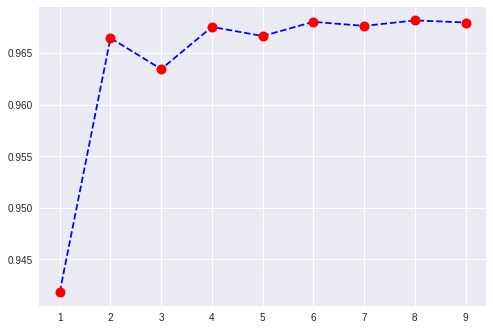

In [90]:
best_k=[]
for k in range(1,10):
    #k=k+1
    KN=KNeighborsClassifier(n_neighbors=k) 
    KN.fit(X_train,y_train)
    yhat4=KN.predict(X_test)
    acc=accuracy_score(y_test,yhat4)
    best_k.append(acc)
plt.plot(range(1,10),best_k,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)

In [0]:
KN=KNeighborsClassifier(n_neighbors=8) 

In [92]:
KN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [0]:
yhat4=KN.predict(X_test)

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat4))

Accuracy: 0.9681626403734466


In [95]:
print(confusion_matrix(y_test, yhat4,labels=[1,0])

[[  1174  27055]
 [   601 839835]]


In [96]:
print(classification_report(y_test, yhat4)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    840436
           1       0.66      0.04      0.08     28229

   micro avg       0.97      0.97      0.97    868665
   macro avg       0.82      0.52      0.53    868665
weighted avg       0.96      0.97      0.95    868665

